**Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

**Loading the train dataset into python environment**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_ctrUa4K.csv to train_ctrUa4K.csv


In [ ]:
data_train = pd.read_csv('train_ctrUa4K.csv')
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Understanding and exploring the data**

In [ ]:
data_train.shape

(614, 13)

In [ ]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


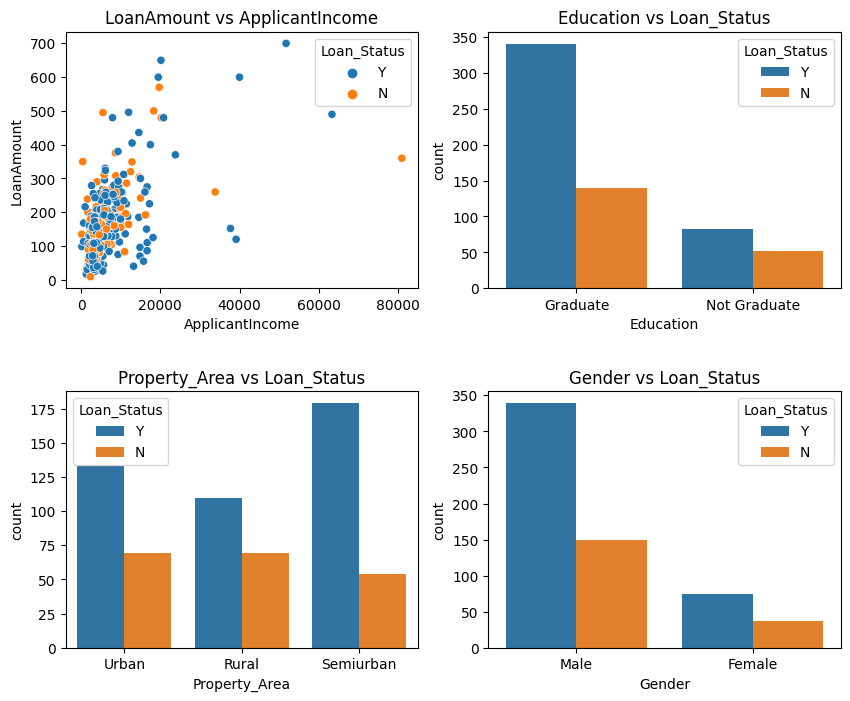

In [ ]:
# Exploring the relationship between variables in train dataset

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

# Scatter plot of LoanAmount vs ApplicantIncome
sns.scatterplot(ax=axes[0, 0], x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data_train)
axes[0, 0].set_title('LoanAmount vs ApplicantIncome')

# Bar plot of Education vs Loan_Status
sns.countplot(ax=axes[0, 1], x='Education', hue='Loan_Status', data=data_train)
axes[0, 1].set_title('Education vs Loan_Status')

# Bar plot of Gender vs Loan_Status
sns.countplot(ax=axes[1, 1], x='Gender', hue='Loan_Status', data=data_train)
axes[1, 1].set_title('Gender vs Loan_Status')

# Bar plot of Property_Area vs Loan_Status
sns.countplot(ax=axes[1, 0], x='Property_Area', hue='Loan_Status', data=data_train)
axes[1, 0].set_title('Property_Area vs Loan_Status')

# Display the plot
plt.show()

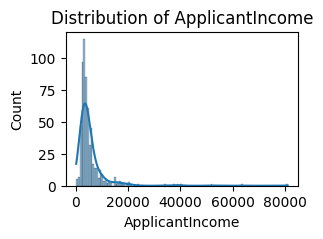

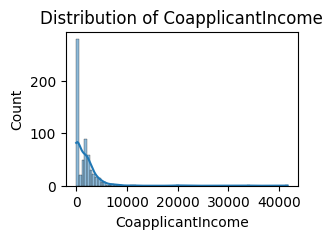

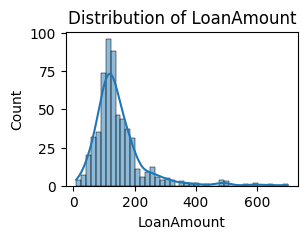

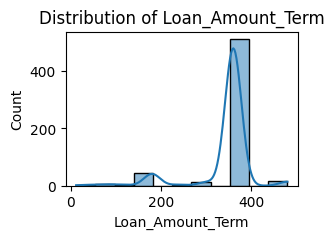

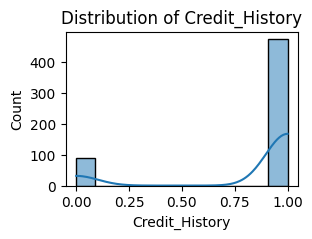

In [ ]:
# Visualize the distribution of numerical variables

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' ,'Credit_History']
for col in numeric_cols:
    plt.figure(figsize=(3, 2))
    sns.histplot(data_train[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

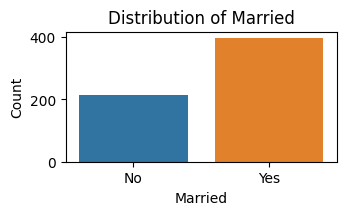

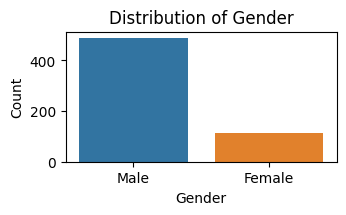

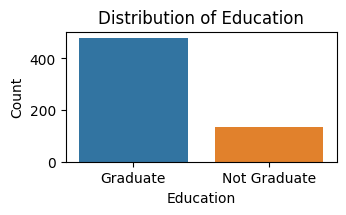

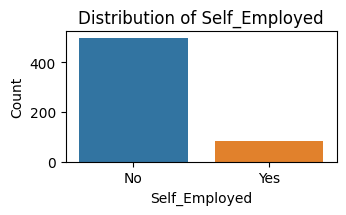

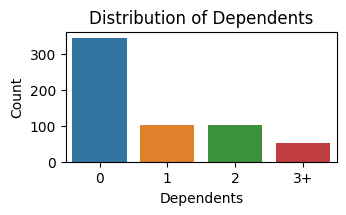

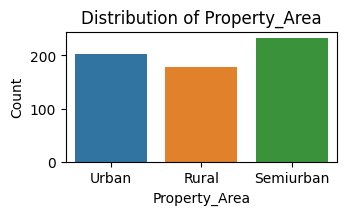

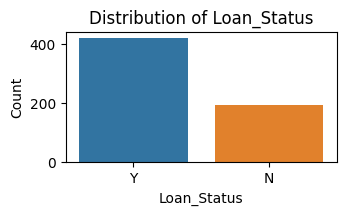

In [ ]:
# Plot the distribution of each categorical variables:

categorical_vars = [ 'Married','Gender',  'Education', 'Self_Employed', 'Dependents','Property_Area', 'Loan_Status']

for var in categorical_vars:
    plt.figure(figsize=(3.5, 1.69))
    sns.countplot(x=var, data=data_train)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(var))
    plt.show()

**data cleaning and outlier detection**

In [ ]:
data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

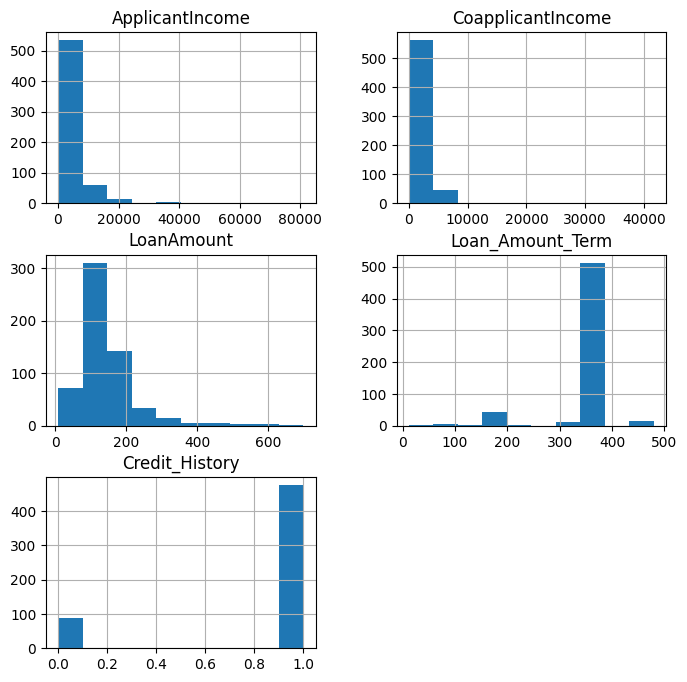

In [ ]:
freqgraph = data_train.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(8,8))
plt.show()

In [ ]:
# Filling the missing values in the Numerical columns of the train dataset with the median value of the each respective column

for col in ['LoanAmount', 'Loan_Amount_Term','Credit_History']:
    data_train[col]=data_train[col].fillna(data_train[col].median())

In [ ]:
# Filling the missing values in Categorical columns of the train dataset with the mode value of each respective column

for col in ['Gender', 'Married', 'Dependents','Self_Employed']:
    data_train[col] = data_train[col].fillna(data_train[col].mode()[0])

In [ ]:
data_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

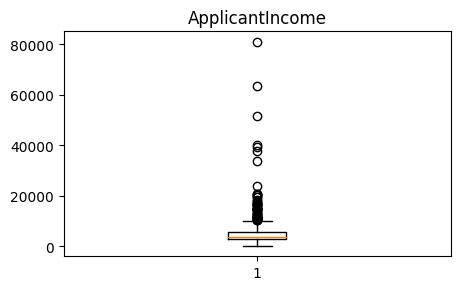

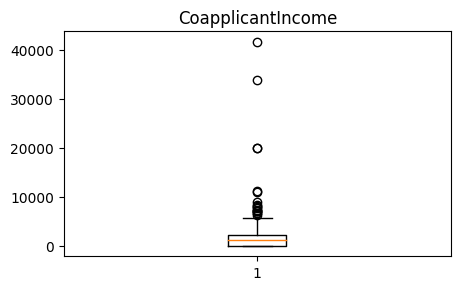

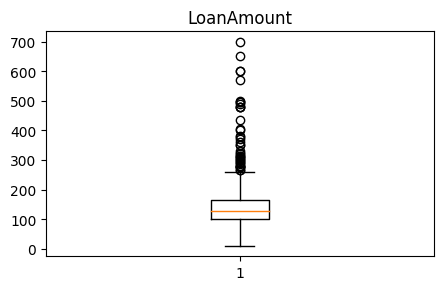

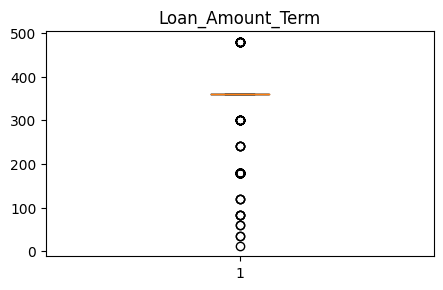

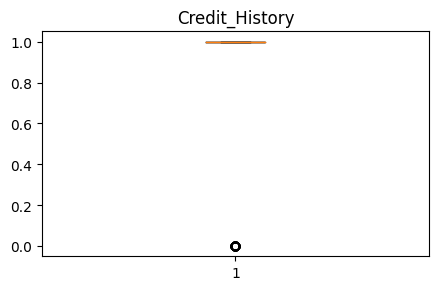

In [ ]:
num_cols = ['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount', 'Loan_Amount_Term' , 'Credit_History']

for i in num_cols:
    plt.figure(figsize=(5,2.92))
    plt.boxplot(data_train[i])
    plt.title(i)

In [ ]:
# Calculating the quartiles Q1, Q2 (median), and Q3 of the ApplicantIncome column

Q1 = np.percentile(data_train['ApplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(data_train['ApplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(data_train['ApplicantIncome'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 2879.0
Q2 = 3812.5
Q3 = 5790.0


In [ ]:
# Calculating the IQR

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 2911.0


In [ ]:
# Defining the upper and lower limits for outliers

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  10156.5
low_lim =  -1487.5


In [ ]:
outliers = []

for x in data_train ['ApplicantIncome'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]


In [ ]:
# Handling the outliers in the ApplicantIncome column of the dataset

data_train['ApplicantIncome'] = np.where(data_train['ApplicantIncome'] > up_lim, up_lim, np.where(data_train['ApplicantIncome'] < low_lim, low_lim, data_train['ApplicantIncome']))

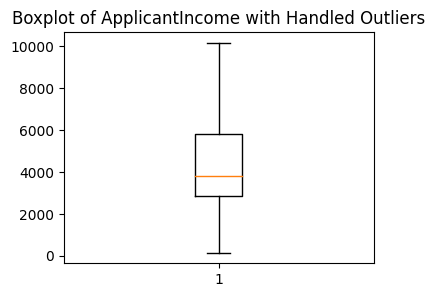

In [ ]:
plt.figure(figsize=(4, 3))
plt.boxplot(data_train['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome with Handled Outliers')
plt.show()

In [ ]:
# Calculating the quartiles Q1, Q2 (median), and Q3 of the CoapplicantIncome column :

Q1 = np.percentile(data_train['CoapplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(data_train['CoapplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(data_train['CoapplicantIncome'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 0.0
Q2 = 1188.5
Q3 = 2292.5


In [ ]:
# Calculating the IQR

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 2292.5


In [ ]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  5731.25
low_lim =  -3438.75


In [ ]:
outliers = []

for x in data_train ['CoapplicantIncome'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]


In [ ]:
# Handling the outliers in the CoapplicantIncome column of the dataset

data_train['CoapplicantIncome'] = np.where(data_train['CoapplicantIncome'] > up_lim, up_lim, np.where(data_train['CoapplicantIncome'] < low_lim, low_lim, data_train['CoapplicantIncome']))

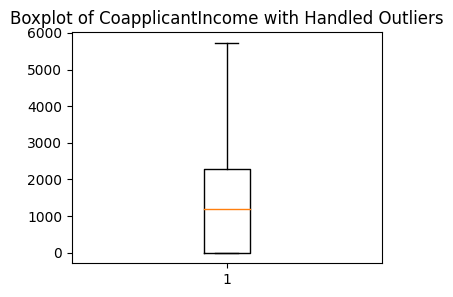

In [ ]:
plt.figure(figsize=(4, 3))
plt.boxplot(data_train['CoapplicantIncome'])
plt.title('Boxplot of CoapplicantIncome with Handled Outliers')
plt.show()

In [ ]:
# Calculating the quartiles Q1, Q2 (median), and Q3 of the LoanAmount column

Q1 = np.percentile(data_train['LoanAmount'],25,interpolation='midpoint')
Q2 = np.percentile(data_train['LoanAmount'],50,interpolation='midpoint')
Q3 = np.percentile(data_train['LoanAmount'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 100.5
Q2 = 128.0
Q3 = 164.5


In [ ]:
# Calculating the IQR

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 64.0


In [ ]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  260.5
low_lim =  4.5


In [ ]:
outliers = []

for x in data_train ['LoanAmount'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [ ]:
# Handling the outliers in the LoanAmount column of the dataset

data_train['LoanAmount'] = np.where(data_train['LoanAmount'] > up_lim, up_lim, np.where(data_train['LoanAmount'] < low_lim, low_lim, data_train['LoanAmount']))

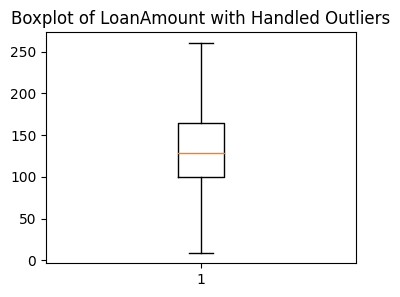

In [ ]:
plt.figure(figsize=(4, 3))
plt.boxplot(data_train['LoanAmount'])
plt.title('Boxplot of LoanAmount with Handled Outliers')
plt.show()

In [ ]:
# Calculating the quartiles Q1, Q2 (median), and Q3 of the Loan_Amount_Term column

Q1 = np.percentile(data_train['Loan_Amount_Term'],25,interpolation='midpoint')
Q2 = np.percentile(data_train['Loan_Amount_Term'],50,interpolation='midpoint')
Q3 = np.percentile(data_train['Loan_Amount_Term'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 360.0
Q2 = 360.0
Q3 = 360.0


In [ ]:
IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 0.0


In [ ]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  360.0
low_lim =  360.0


In [ ]:
outliers = []

for x in data_train ['Loan_Amount_Term'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[120.0, 240.0, 180.0, 180.0, 60.0, 300.0, 480.0, 300.0, 240.0, 180.0, 120.0, 180.0, 180.0, 480.0, 180.0, 180.0, 480.0, 120.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 180.0, 480.0, 180.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 60.0, 180.0, 180.0, 480.0, 180.0, 36.0, 180.0, 300.0, 480.0, 480.0, 84.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 480.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 180.0, 300.0, 300.0, 180.0, 240.0, 300.0, 300.0, 180.0, 180.0, 180.0, 180.0, 300.0, 84.0, 12.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 36.0, 180.0, 480.0, 84.0, 84.0, 180.0, 240.0, 180.0, 180.0, 180.0, 180.0]


In [ ]:
# Calculating the quartiles Q1, Q2 (median), and Q3 of the Credit_History column :

Q1 = np.percentile(data_train['Credit_History'],25,interpolation='midpoint')
Q2 = np.percentile(data_train['Credit_History'],50,interpolation='midpoint')
Q3 = np.percentile(data_train['Credit_History'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 1.0
Q2 = 1.0
Q3 = 1.0


In [ ]:
IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 0.0


In [ ]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  1.0
low_lim =  1.0


In [ ]:
outliers = []

for x in data_train ['Credit_History'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


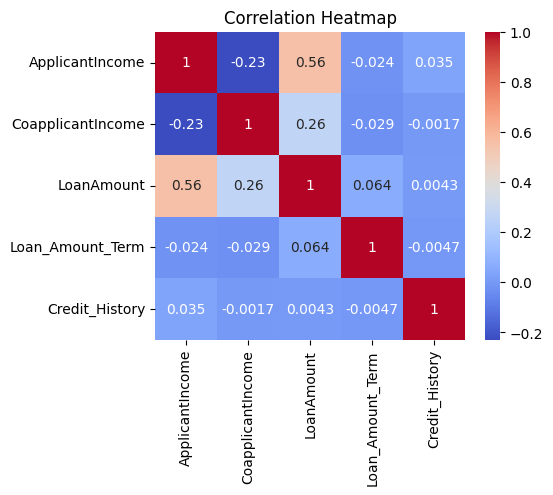

In [ ]:
corr_matrix = data_train.corr()

# Creating a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

**Preprocessing the Data**

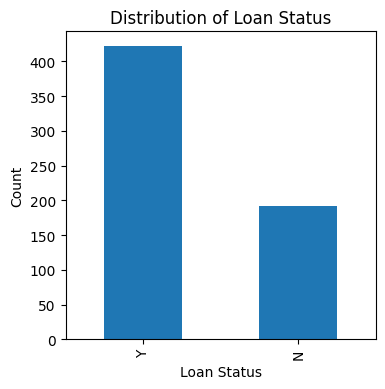

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
plt.figure(figsize=(4, 4))
data_train['Loan_Status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

data_train['Loan_Status'].value_counts()

**Encoding**

In [ ]:
# Check the distribution of the categorical variables
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']

# Calculate the value counts for each column
print (data_train[categorical_vars].value_counts())

Gender  Married  Dependents  Education     Self_Employed  Property_Area  Loan_Status
Male    Yes      0           Graduate      No             Semiurban      Y              39
                                                          Urban          Y              29
                                                          Rural          Y              25
                 2           Graduate      No             Semiurban      Y              18
        No       0           Graduate      No             Semiurban      Y              18
                                                                                        ..
Female  No       3+          Not Graduate  No             Urban          N               1
                             Graduate      No             Urban          N               1
                                                          Rural          Y               1
                 2           Graduate      No             Urban          N               1
Male 

In [ ]:
# Separate the features
X = data_train.drop(['Loan_Status','Loan_ID'], axis=1)  #Drop unnecessary columns also
y = data_train['Loan_Status']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


**Train and Evaluate the model by applying Classification Algorithms**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Classifier

model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model2.fit(X_train, y_train)
y_pred_dt = model2.predict(X_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))
print('precision = ',precision_score(y_test,y_pred_dt, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_dt, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_dt))

Accuracy =  0.6991869918699187
precision =  0.6655913978494623
Recall =  0.6343023255813953
f1 score = 0.6396389262807824
confusion_matrix =
 [[18 25]
 [12 68]]


In [ ]:
# Random Forest Classifier

model1 = RandomForestClassifier(n_estimators = 10,max_depth = 20,criterion = 'entropy',min_samples_split = 3)
model1.fit(X_train, y_train)
y_pred_rf = model1.predict(X_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('precision = ',precision_score(y_test,y_pred_rf, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_rf, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_rf))

Accuracy =  0.7479674796747967
precision =  0.7487373737373737
Recall =  0.6718023255813954
f1 score = 0.6820645376469607
confusion_matrix =
 [[18 25]
 [ 6 74]]


In [ ]:
#Support Vector Machines Classifier

model3 = SVC(kernel='linear', C=1.0, gamma='scale')
model3.fit(X_train, y_train)
y_pred_svm = model3.predict(X_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('precision = ',precision_score(y_test,y_pred_svm, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_svm, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_svm))

Accuracy =  0.7804878048780488
precision =  0.8286407766990291
Recall =  0.6968023255813953
f1 score = 0.7119437939110072
confusion_matrix =
 [[18 25]
 [ 2 78]]


In [ ]:
#kNN Classifier

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    model4 = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    model4.fit(X_train,y_train)
    y_pred_knn = model4.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

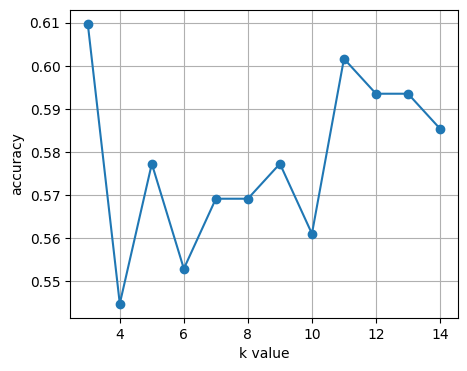

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
model4 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski',p=2)
model4.fit(X_train,y_train)
y_pred_knn = model4.predict(X_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.6097560975609756
precision =  0.5316326530612245
Recall =  0.5225290697674418
f1 score = 0.5122273628552544
confusion_matrix =
 [[10 33]
 [15 65]]


In [ ]:
# Logistic Regression Classifier

model5 = LogisticRegression()
model5.fit(X_train , y_train)
y_pred_lr = model5.predict(X_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_lr, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.7886178861788617
precision =  0.853491902834008
Recall =  0.7030523255813954
f1 score = 0.7196704067321178
confusion_matrix =
 [[18 25]
 [ 1 79]]


In [ ]:
print('Accuracy Decission Tree= ',accuracy_score(y_test,y_pred_dt))
print('Accuracy Random Forest = ',accuracy_score(y_test,y_pred_rf))
print('Accuracy SVM= ',accuracy_score(y_test,y_pred_svm))
print('Accuracy kNN= ',accuracy_score(y_test,y_pred_knn))
print('Accuracy logisticRegression= ',accuracy_score(y_test,y_pred_lr))

Accuracy Decission Tree=  0.6991869918699187
Accuracy Random Forest =  0.7479674796747967
Accuracy SVM=  0.7804878048780488
Accuracy kNN=  0.6097560975609756
Accuracy logisticRegression=  0.7886178861788617


In [ ]:
accuracies = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'kNN': accuracy_score(y_test, y_pred_knn),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr)
}

max_accuracy = max(accuracies.values())

# Find the best models with the maximum accuracy
best_models = [model for model, accuracy in accuracies.items() if accuracy == max_accuracy]

# Print the best models
print("Best Model:")
for model in best_models:
    print(model)

print('Max Accuracy:', max_accuracy)

Best Model:
Logistic Regression
Max Accuracy: 0.7886178861788617


**Loading the test dataset into python environment**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG.csv


In [ ]:
data_test = pd.read_csv('test_lAUu6dG.csv')
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Understanding and exploring the data**

In [ ]:
data_test.shape

(367, 12)

In [ ]:
data_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


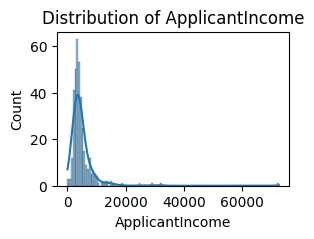

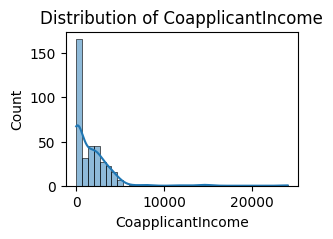

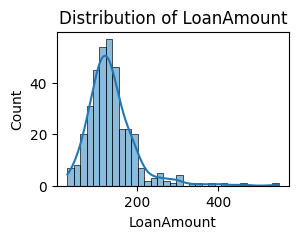

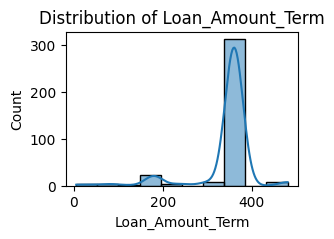

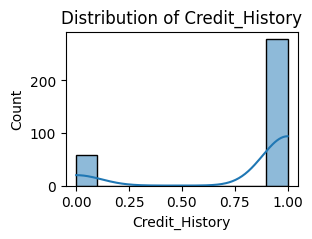

In [ ]:
# Visualising the distribution of numerical variables

numeric_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' ,'Credit_History']
for col in numeric_vars:
    plt.figure(figsize=(3, 2))
    sns.histplot(data_test[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

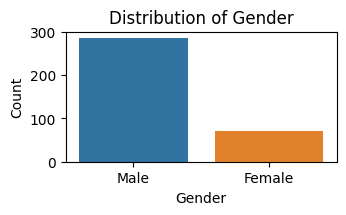

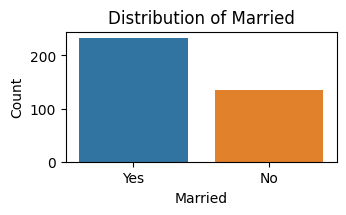

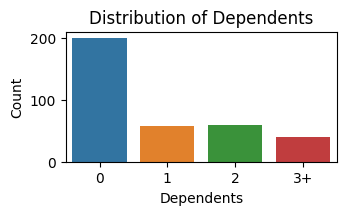

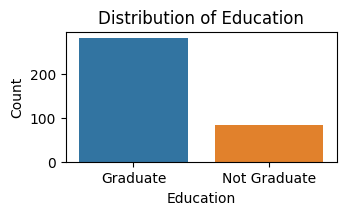

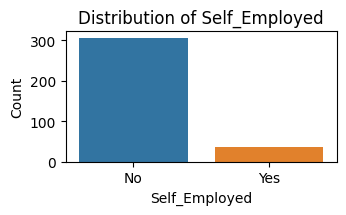

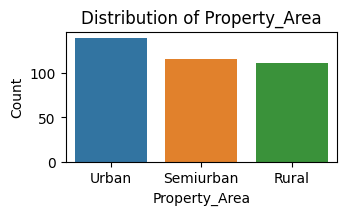

In [ ]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for var in categorical_cols:
    plt.figure(figsize=(3.5, 1.69))
    sns.countplot(x=var, data=data_test)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(var))
    plt.show()

**data cleaning and outlier detection**

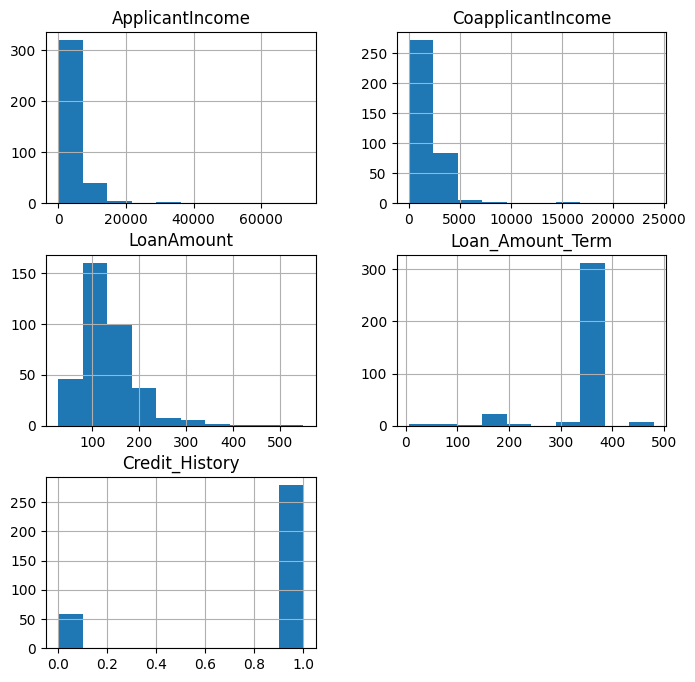

In [ ]:
# Handling the missing values

freqgraph = data_test.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(8,8))
plt.show()

In [ ]:
# Filling the missing values in the Numerical columns of the test dataset with the median value of the each respective column:

for col in ['LoanAmount', 'Loan_Amount_Term','Credit_History']:
    data_test[col]=data_test[col].fillna(data_test[col].median())

In [ ]:
# Filling the missing values in Categorical columns of the test dataset with the mode value of each respective column:

for col in ['Gender','Dependents','Self_Employed']:
    data_test[col] = data_test[col].fillna(data_test[col].mode()[0])

In [ ]:
data_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

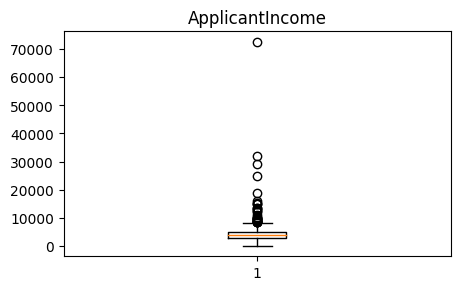

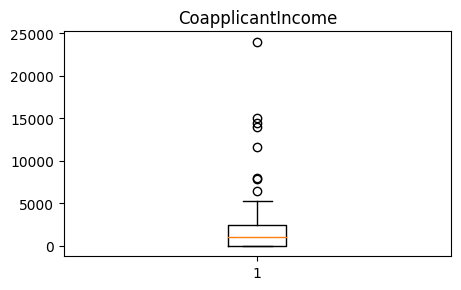

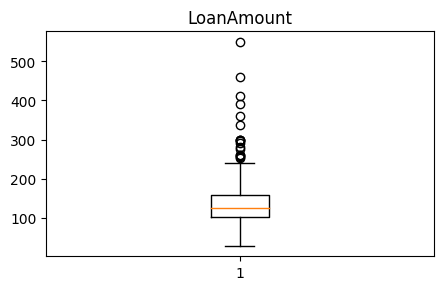

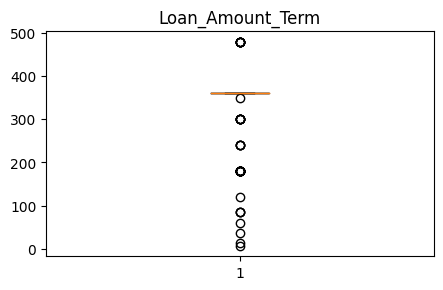

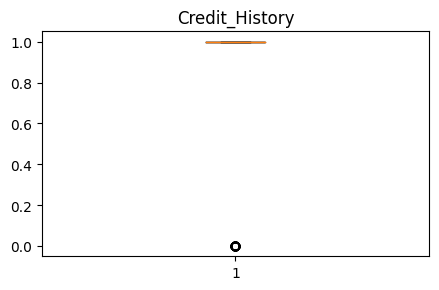

In [ ]:
# Checking for outliers

num_cols = ['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount', 'Loan_Amount_Term' , 'Credit_History']

for i in num_cols:
    plt.figure(figsize=(5,2.92))
    plt.boxplot(data_test[i])
    plt.title(i)

In [ ]:
#ApplicantIncome column

Q1 = np.percentile(data_test['ApplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(data_test['ApplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(data_test['ApplicantIncome'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)


Q1 = 2864.0
Q2 = 3786.0
Q3 = 5060.0


In [ ]:
IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 2196.0


In [ ]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  8354.0
low_lim =  -430.0


In [ ]:
outliers = []

for x in data_test ['ApplicantIncome'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[13633, 12173, 9226, 72529, 8449, 13518, 9719, 12500, 32000, 10890, 12941, 8703, 15312, 10166, 9167, 13083, 10000, 8706, 14911, 10000, 18840, 24797, 29167, 9000, 10000, 8750, 14987, 16000, 9699, 8667, 8550, 9200]


In [ ]:
data_test['ApplicantIncome'] = np.where(data_test['ApplicantIncome'] > up_lim, up_lim, np.where(data_test['ApplicantIncome'] < low_lim, low_lim, data_test['ApplicantIncome']))

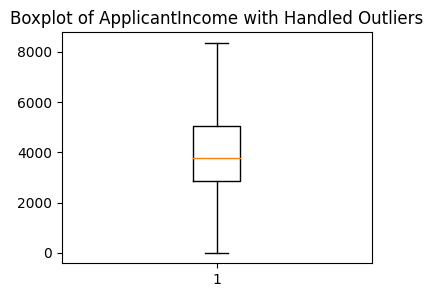

In [ ]:
plt.figure(figsize=(4, 3))
plt.boxplot(data_test['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome with Handled Outliers')
plt.show()

In [ ]:
#CoapplicantIncome column :

Q1 = np.percentile(data_test['CoapplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(data_test['CoapplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(data_test['CoapplicantIncome'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 0.0
Q2 = 1025.0
Q3 = 2430.5


In [ ]:
IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 2430.5


In [ ]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  6076.25
low_lim =  -3645.75


In [ ]:
outliers = []

for x in data_test ['CoapplicantIncome'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[7916, 24000, 8000, 6414, 14507, 13983, 11666, 15000]


In [ ]:
data_test['CoapplicantIncome'] = np.where(data_test['CoapplicantIncome'] > up_lim, up_lim, np.where(data_test['CoapplicantIncome'] < low_lim, low_lim, data_test['CoapplicantIncome']))

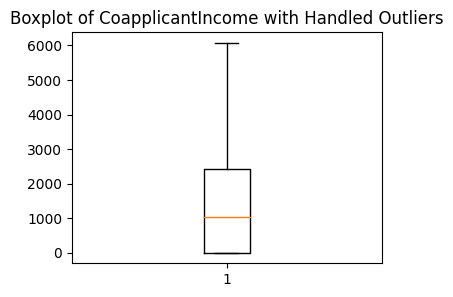

In [ ]:
plt.figure(figsize=(4, 3))
plt.boxplot(data_test['CoapplicantIncome'])
plt.title('Boxplot of CoapplicantIncome with Handled Outliers')
plt.show()

In [ ]:
#LoanAmount column

Q1 = np.percentile(data_test['LoanAmount'],25,interpolation='midpoint')
Q2 = np.percentile(data_test['LoanAmount'],50,interpolation='midpoint')
Q3 = np.percentile(data_test['LoanAmount'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 101.0
Q2 = 125.0
Q3 = 157.5


In [ ]:
IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 56.5


In [ ]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  242.25
low_lim =  16.25


In [ ]:
outliers = []

for x in data_test ['LoanAmount'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 460.0, 297.0, 300.0, 260.0, 254.0]


In [ ]:
data_test['LoanAmount'] = np.where(data_test['LoanAmount'] > up_lim, up_lim, np.where(data_test['LoanAmount'] < low_lim, low_lim, data_test['LoanAmount']))

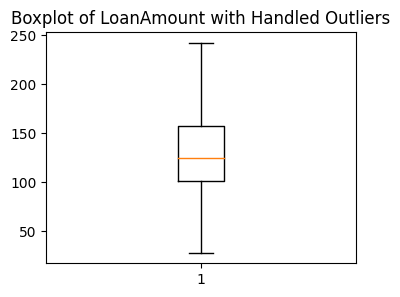

In [ ]:
plt.figure(figsize=(4, 3))
plt.boxplot(data_test['LoanAmount'])
plt.title('Boxplot of LoanAmount with Handled Outliers')
plt.show()

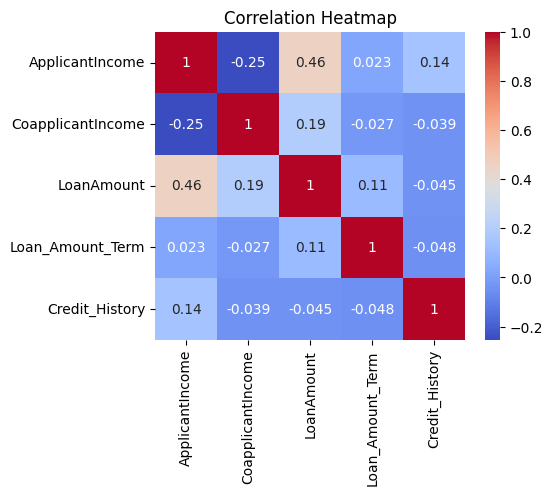

In [ ]:
corr_matrix = data_test.corr()

# Createing a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

**Data preprocessing and encoding**

In [ ]:
# Check the distribution of the categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']

# Calculate the value counts for each column
print (data_test[categorical_cols].value_counts())

Gender  Married  Dependents  Education     Self_Employed  Property_Area
Male    Yes      0           Graduate      No             Urban            23
        No       0           Graduate      No             Urban            23
        Yes      0           Graduate      No             Semiurban        19
        No       0           Graduate      No             Semiurban        18
                                                          Rural            17
                                                                           ..
                 1           Graduate      No             Urban             1
                 2           Graduate      No             Urban             1
                             Not Graduate  No             Urban             1
                 3+          Graduate      No             Semiurban         1
        Yes      3+          Not Graduate  Yes            Urban             1
Length: 86, dtype: int64


In [ ]:
data_test1 = data_test.drop(['Loan_ID'], axis=1)

# OneHot encode categorical variables
data_test1 = pd.get_dummies(data_test1)

In [ ]:
# Making predictions on the test dataset

test_predictions1 = model3.predict(data_test1)
test_predictions= model5.predict(data_test1)

**Preparing the submission file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission_49d68Cx.csv to sample_submission_49d68Cx.csv


In [ ]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [ ]:
submission = pd.DataFrame({'Loan_ID': submission['Loan_ID'], 'Loan_Status': test_predictions})
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
submission.to_csv('submission.csv', index=False)